## Train QuickNAT
Working code! Details coming soon!

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

from quickNat_pytorch.quickNAT import quickNAT
from quickNat_pytorch.data_utils import get_data

from quickNat_pytorch.net_api import squeeze_excitation as se

#torch.set_default_tensor_type('torch.FloatTensor')
%matplotlib inline
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'



params ={
    'data' : {
        'base_dir' : "datasets/coronal",
        'train_data_file' : "Data_train.h5", 
        'train_label_file' : "Label_train.h5",
        'train_class_weights_file' : "Class_Weight_train.h5",        
        'train_weights_file' : "Weight_train.h5",                
        'test_data_file' : "Data_test.h5", 
        'test_label_file' : "Label_test.h5",         
        'test_class_weights_file' : "Class_Weight_test.h5",       
        'test_weights_file' : "Weight_test.h5",
        'labels' : ['Background','Left WM','Left Cortex','Left Lateral ventricle','Left Inf LatVentricle','Left Cerebellum WM','Left Cerebellum Cortex',
                    'Left Thalamus','Left Caudate','Left Putamen','Left Pallidum','3rd Ventricle','4th Ventricle','Brain Stem','Left Hippocampus',
                    'Left Amygdala','CSF (Cranial)','Left Accumbens','Left Ventral DC','Right WM','Right Cortex','Right Lateral Ventricle',
                    'Right Inf LatVentricle','Right Cerebellum WM','Right Cerebellum Cortex','Right Thalamus','Right Caudate','Right Putamen',
                    'Right Pallidum','Right Hippocampus','Right Amygdala','Right Accumbens','Right Ventral DC']
    },
    'network' : { 
        'num_class': 33,
        'num_channels':1,
        'num_filters':64,
        'kernel_h':5,
        'kernel_w':5,
        'kernel_c': 1,
        'stride_conv':1,
        'pool':2,
        'stride_pool':2,
        'se_block' : se.SELayer.NONE, # Valid options : se.SELayer.NONE, se.SELayer.CSE, se.SELayer.SSE, se.SELayer.CSSE
        'drop_out' : 0 # Keep 0 for no dropout        
    },
    'training' : {
        'learning_rate': 1e-2,
        'train_batch_size': 2,
        'val_batch_size': 5,
        'log_nth': 50,
        'num_epochs': 10,
        'lr_scheduler_step_size': 5,
        'lr_scheduler_gamma' : 0.5,
        'exp_dir_name': 'Exp02_try3',
        'final_model_path': 'models/quicknat_model.model', 
    }
}

train_params, net_params, data_params = params['training'], params['network'], params['data']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Data

In [23]:
train_data, test_data = get_data(data_params)
print("Train size: %i" % len(train_data))
print("Test size: %i" % len(test_data))

Train size: 1320
Test size: 1320


## Train Model

In [24]:
from quickNat_pytorch.quickNAT import quickNAT
from quickNat_pytorch.solver import Solver

train_loader = torch.utils.data.DataLoader(train_data, batch_size=train_params['train_batch_size'], shuffle=True, num_workers=4)
val_loader = torch.utils.data.DataLoader(test_data, batch_size=train_params['val_batch_size'], shuffle=False, num_workers=4)

quicknat_model = quickNAT(params['network'])
solver = Solver(optim_args={"lr": train_params['learning_rate']}, labels = params['data']['labels'])
solver.train(quicknat_model, train_loader, val_loader, 
             log_nth=train_params['log_nth'], 
             num_epochs=train_params['num_epochs'], 
             exp_dir_name=train_params['exp_dir_name'], 
             lr_scheduler_step_size = train_params['lr_scheduler_step_size'], 
             lr_scheduler_gamma = train_params['lr_scheduler_gamma'])

33
START TRAIN.
1
torch.Size([131072, 33]) torch.Size([131072])
1
torch.Size([131072, 33]) torch.Size([131072])
1
torch.Size([131072, 33]) torch.Size([131072])
1
torch.Size([131072, 33]) torch.Size([131072])
1
torch.Size([131072, 33]) torch.Size([131072])
1
torch.Size([131072, 33]) torch.Size([131072])
1
torch.Size([131072, 33]) torch.Size([131072])
1
torch.Size([131072, 33]) torch.Size([131072])
1
torch.Size([131072, 33]) torch.Size([131072])
1
torch.Size([131072, 33]) torch.Size([131072])
1
torch.Size([131072, 33]) torch.Size([131072])
1
torch.Size([131072, 33]) torch.Size([131072])
1
torch.Size([131072, 33]) torch.Size([131072])
1
torch.Size([131072, 33]) torch.Size([131072])
1
torch.Size([131072, 33]) torch.Size([131072])
1
torch.Size([131072, 33]) torch.Size([131072])
1
torch.Size([131072, 33]) torch.Size([131072])
1
torch.Size([131072, 33]) torch.Size([131072])
1
torch.Size([131072, 33]) torch.Size([131072])
1
torch.Size([131072, 33]) torch.Size([131072])
1
torch.Size([131072, 33

Process Process-32:
Process Process-31:
Traceback (most recent call last):
KeyboardInterrupt
Traceback (most recent call last):
  File "/home/masterthesis/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()


KeyboardInterrupt: 

  File "/home/masterthesis/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/masterthesis/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/masterthesis/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/masterthesis/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 96, in _worker_loop
    r = index_queue.get(timeout=MANAGER_STATUS_CHECK_INTERVAL)
  File "/home/masterthesis/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 96, in _worker_loop
    r = index_queue.get(timeout=MANAGER_STATUS_CHECK_INTERVAL)


  File "/home/masterthesis/anaconda3/lib/python3.6/multiprocessing/queues.py", line 104, in get
    if not self._poll(timeout):
  File "/home/masterthesis/anaconda3/lib/python3.6/multiprocessing/queues.py", line 104, in get
    if not self._poll(timeout):
  File "/home/masterthesis/anaconda3/lib/python3.6/multiprocessing/connection.py", line 257, in poll
    return self._poll(timeout)
  File "/home/masterthesis/anaconda3/lib/python3.6/multiprocessing/connection.py", line 257, in poll
    return self._poll(timeout)
  File "/home/masterthesis/anaconda3/lib/python3.6/multiprocessing/connection.py", line 414, in _poll
    r = wait([self], timeout)
  File "/home/masterthesis/anaconda3/lib/python3.6/multiprocessing/connection.py", line 414, in _poll
    r = wait([self], timeout)
  File "/home/masterthesis/anaconda3/lib/python3.6/multiprocessing/connection.py", line 911, in wait
    ready = selector.select(timeout)
  File "/home/masterthesis/anaconda3/lib/python3.6/selectors.py", line 376, in

## Save the Model

When you are satisfied with your training, you can save the model.

In [15]:
quicknat_model.save(train_params['final_model_path'])

Saving model... models/Exp02_try3/quicknat_model.model


## Deploy Model on Test Data

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  31.  32.]


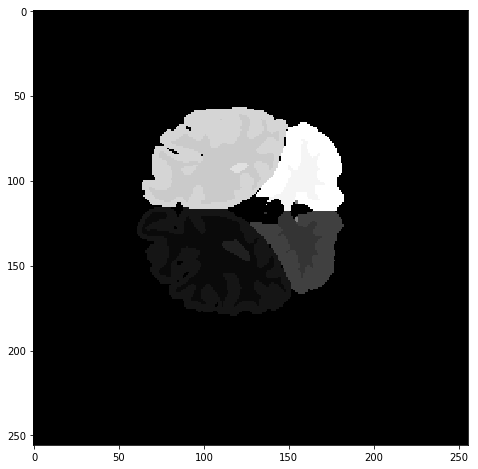

In [15]:
import matplotlib.pyplot as plt

# quick_model = torch.load(train_params['final_model_path'])
# quick_model = quick_model.eval()
# with torch.no_grad():
#     test_input = Variable(torch.Tensor(test_data.X[200:201]).cuda())
# #quick_model.enable_test_dropout()
# out = quick_model(test_input)
# max_val, idx = torch.max(out,1)
# idx = idx.data.cpu().numpy()
# idx = np.squeeze(idx)
# plt.imshow(idx)
# plt.show()

print(np.unique(test_data.y))
img_test = test_data.y[201:202]
img_test = np.squeeze(img_test)
plt.imshow(img_test)
plt.show()